In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [3]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')

In [4]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))

Building house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  250
Sky building data:  250
Mud house data:  250


In [5]:
dataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  6


## Dataset Preprocessing using ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
WIDTH=224
HEIGHT=224

In [8]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=30,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest')
                                     
validation_generator=ImageDataGenerator(rescale=1./255)

train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building/train',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical')

validation_dataset = validation_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building/test',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 1500 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [9]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [10]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

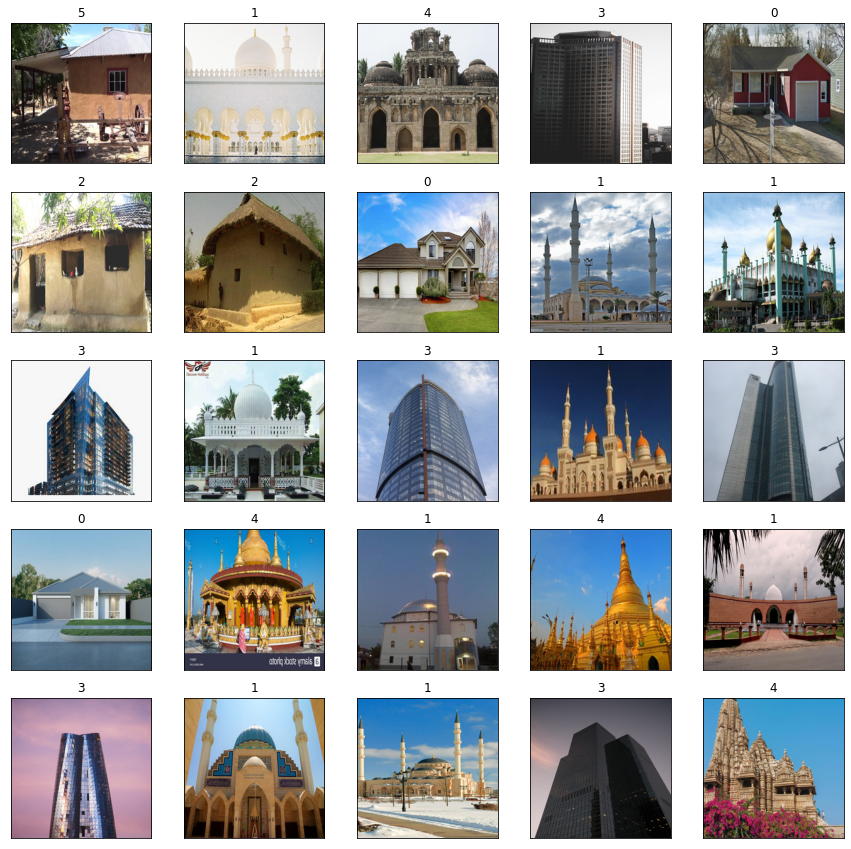

In [12]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

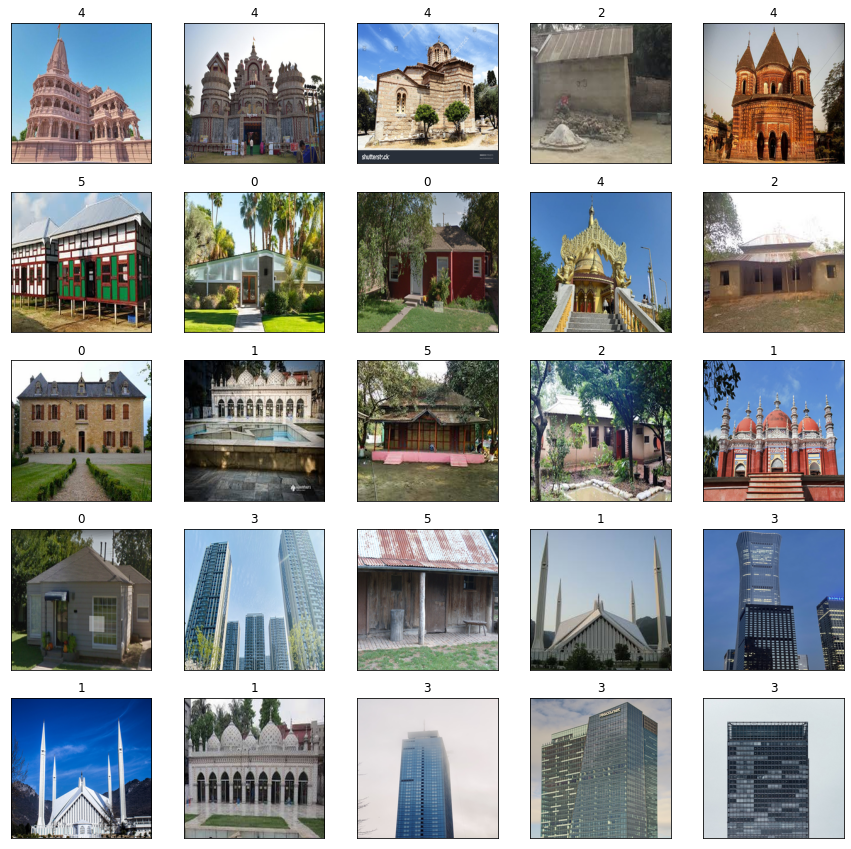

In [13]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import DenseNet

In [16]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import layers
import tensorflow as tf

In [19]:
base_model=DenseNet121(input_shape=(224,224,3),include_top=False)

29089792/29084464 [==============================] - 44s 2us/step


In [20]:
base_model.trainable = False

In [21]:
total_class

6

In [22]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 7,043,654
Trainable params: 6,150
Non-trainable params: 7,037,504
_________________________________________________________________


In [56]:
#base_model.summary()

## Compile the model

In [25]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [26]:
epochs=10
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

1500
300
46
9


In [27]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/10
46/46 [==============================] - 127s 3s/step - loss: 1.1440 - accuracy: 0.5974 - val_loss: 0.5258 - val_accuracy: 0.8576
Epoch 2/10
46/46 [==============================] - 139s 3s/step - loss: 0.4044 - accuracy: 0.8903 - val_loss: 0.2757 - val_accuracy: 0.9410
Epoch 3/10
46/46 [==============================] - 145s 3s/step - loss: 0.2795 - accuracy: 0.9162 - val_loss: 0.2339 - val_accuracy: 0.9340
Epoch 4/10
46/46 [==============================] - 148s 3s/step - loss: 0.2265 - accuracy: 0.9353 - val_loss: 0.1954 - val_accuracy: 0.9444
Epoch 5/10
46/46 [==============================] - 143s 3s/step - loss: 0.1943 - accuracy: 0.9455 - val_loss: 0.1760 - val_accuracy: 0.9514
Epoch 6/10
46/46 [==============================] - 145s 3s/step - loss: 0.1747 - accuracy: 0.9510 - val_loss: 0.1473 - val_accuracy: 0.9549
Epoch 7/10
46/46 [==============================] - 145s 3s/step - loss: 0.1576 - accuracy: 0.9571 - val_loss: 0.1564 - val_accuracy: 0.9514
Epoch 8/10
46

## Plot Accuracy and Loss Graph

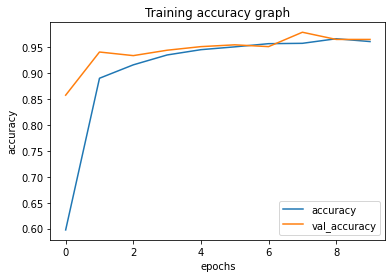

In [28]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

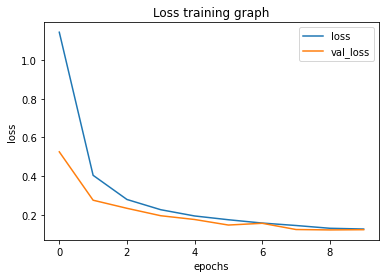

In [29]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [30]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

10/10 [==============================] - 20s 2s/step - loss: 0.1199 - accuracy: 0.9667
Test Loss:  0.1198878362774849
Test Accuracy:  0.9666666388511658


In [31]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  96.66666388511658


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

In [32]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[5.3429505e-10 4.2474370e-15 7.6902367e-22 6.9445542e-15 1.2465680e-15
  7.7162929e-13]]
0


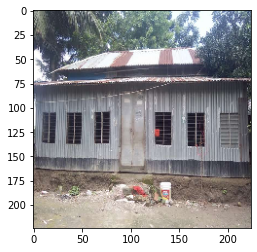

In [54]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.7909298e-19 5.8877786e-26 4.3943203e-29 3.4092413e-23 5.5179015e-20
  1.8290856e-24]]
0


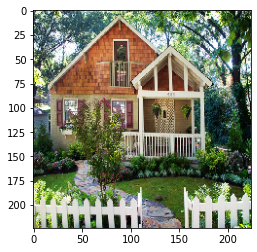

In [34]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.1858941e-13 4.0310338e-17 9.0354881e-31 1.1490460e-21 1.0810213e-25
  8.6046352e-24]]
0


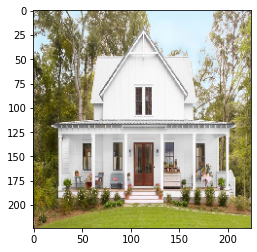

In [35]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.3595479e-21 8.2603877e-18 6.0665438e-35 1.8121468e-24 7.3864237e-33
  8.4020499e-29]]
1


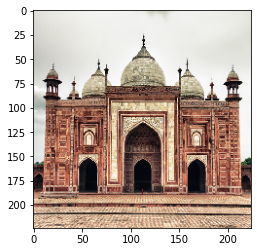

In [36]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [39]:
import time
t = time.time()

export_path_keras = "Saved Model/DenseNet_{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/DenseNet_0.9666666388511658_model_1617375891.h5


## Reload the model h5 format

In [40]:
from tensorflow.keras.models import load_model

In [42]:
model_path='Saved Model/DenseNet_0.9666666388511658_model_1617375891.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 7,043,654
Trainable params: 6,150
Non-trainable params: 7,037,504
_________________________________________________________________


## Experiment with reload model h5 format

In [43]:
print(len(reload_model.weights))
print(reload_model.output_shape)

606
(None, 6)


## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [45]:
t = time.time()

export_path_sm = "Saved Model/TL DenseNet {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

Saved Model/TL DenseNet 0.9666666388511658 Model 1617375986
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model/TL DenseNet 0.9666666388511658 Model 1617375986\assets


## Load SavedModel

In [47]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [48]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(densenet121_input) at 0x1D61C2E09D0>

In [49]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1d627c5e880>